In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [31]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 1 a) Which 2 demographics have proven to be the most popular with the telco brand?

In [49]:
TelcoChurn_No = df.loc[df['Churn']=='No']
demo = TelcoChurn_No.groupby(['gender','SeniorCitizen','Partner','Dependents'])['Churn'].value_counts().unstack()
demo

Churn                                     No
gender SeniorCitizen Partner Dependents     
Female 0             No      No          909
                             Yes         110
                     Yes     No          482
                             Yes         720
       1             No      No          159
                             Yes           2
                     Yes     No          136
                             Yes          31
Male   0             No      No          963
                             Yes         168
                     Yes     No          439
                             Yes         717
       1             No      No          126
                             Yes           4
                     Yes     No          176
                             Yes          32

The 2 demographics most popular with the Telco Brand are;
1.Of the Female and Male gender who are not senior citizens, donot have partners and donot have dependants.

The other most popular group would be;
2. Of the Female and Male gender who are not senior citizens, have partners and have dependants. 

# b) If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [56]:
TelcoChurn_No = df.loc[df['Churn']=='Yes']
demo = TelcoChurn_No.groupby(['gender','SeniorCitizen','Partner','Dependents'])['Churn'].value_counts().unstack()
demo

Churn                                    Yes
gender SeniorCitizen Partner Dependents     
Female 0             No      No          429
                             Yes          32
                     Yes     No          114
                             Yes         124
       1             No      No          158
                             Yes           1
                     Yes     No           73
                             Yes           8
Male   0             No      No          418
                             Yes          43
                     Yes     No          128
                             Yes         105
       1             No      No          118
                             Yes           1
                     Yes     No          105
                             Yes          12

Advertisements should be targeted to;

1.Those of the Female and Male gender who are not senior citizens, donot have partners and donot have dependants.

2. Those of the Female and Male gender who are not senior citizens, have partners and have dependants.

# 2 a) Identifying services contributing to a higher monthly charge and resulting to customers churning

In [92]:
services = df.loc[:,['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MonthlyCharges','Churn']]


TelcoChurn_Yes = services.loc[df['Churn']=='Yes']
TelcoChurn_Yes

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
2,Yes,No,DSL,Yes,Yes,No,No,No,No,53.85,Yes
4,Yes,No,Fiber optic,No,No,No,No,No,No,70.70,Yes
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Yes
13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7021,Yes,No,DSL,No,No,No,Yes,Yes,No,59.80,Yes
7026,Yes,No,DSL,No,No,No,No,No,No,44.20,Yes
7032,Yes,Yes,Fiber optic,No,No,No,No,No,No,75.75,Yes
7034,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,102.95,Yes


<Figure size 1080x720 with 0 Axes>

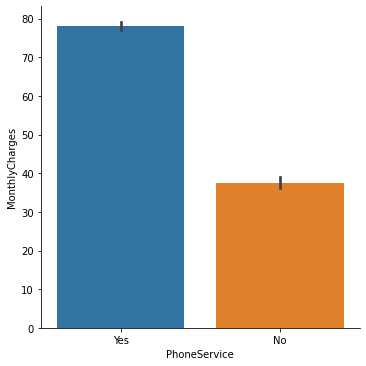

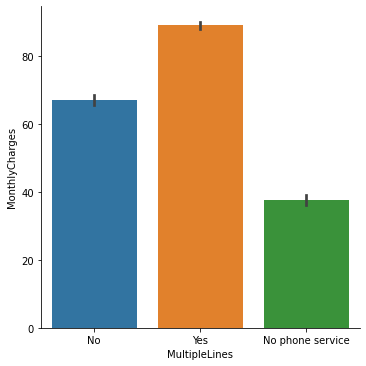

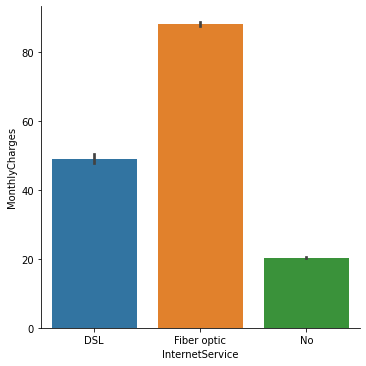

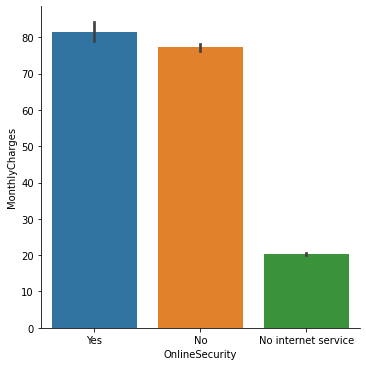

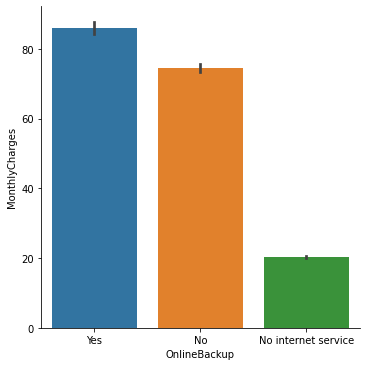

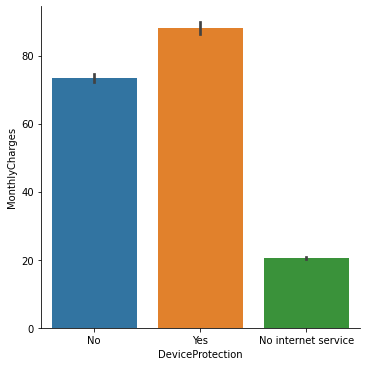

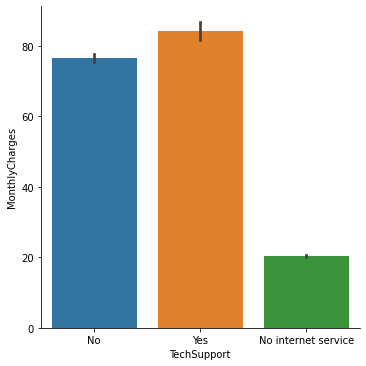

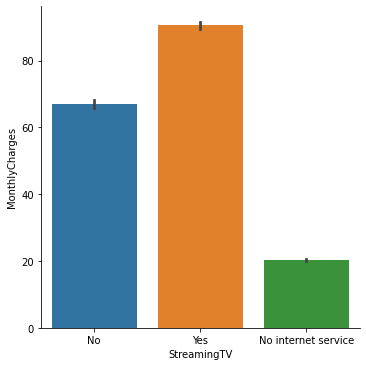

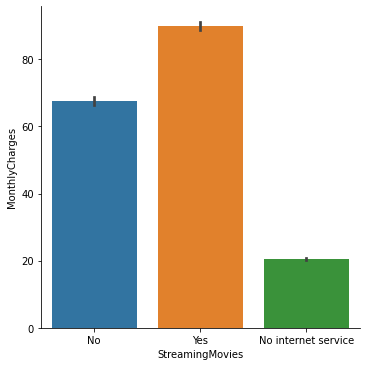

<Figure size 1080x720 with 0 Axes>

In [96]:
sns.catplot(x='PhoneService',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='MultipleLines',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='InternetService',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='OnlineSecurity',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='OnlineBackup',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='DeviceProtection',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='TechSupport',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='StreamingTV',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
sns.catplot(x='StreamingMovies',y='MonthlyCharges',data=TelcoChurn_Yes, kind="bar")
plt.figure(figsize=(15,10))


The 3 services contributing to higher monthly charge and resulting to customers churning are customers using;
1.Multiple Lines
2.Streaming Movies
3.Streaming TV

# 2 b) If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [97]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [145]:
services2 = df.groupby(['PhoneService','Contract','Churn'])['MonthlyCharges'].sum().reset_index()
Churn_No = services2.loc[df['PhoneService']=='Yes']
Churn_No

,PhoneService,Contract,Churn,MonthlyCharges
1,No,Month-to-month,Yes,5577.85
2,No,One year,No,5879.70
4,No,Two year,No,8136.25
5,No,Two year,Yes,151.40
6,Yes,Month-to-month,No,128180.25
8,Yes,One year,No,75818.45
9,Yes,One year,Yes,13466.95
10,Yes,Two year,No,90704.30
11,Yes,Two year,Yes,4013.90


Using a Month-to-month contract would encourage customer retention if phone  as a standalone service was offered by the Telco brand. 

# 3 a) If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning: Basic, Plus, Premium

In [146]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [165]:
MonthlyPrice = df.loc[:,['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]
MonthlyPrice

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,No,No phone service,DSL,Yes,No,No,No,No,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No


# 3 b) Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why

In [169]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [187]:
paperless = df.groupby(['PaperlessBilling','PaymentMethod'])['Churn'].value_counts().unstack()
paperless

Churn                                        No  Yes
PaperlessBilling PaymentMethod                      
No               Bank transfer (automatic)  581   72
                 Credit card (automatic)    576   64
                 Electronic check           419  204
                 Mailed check               827  129
Yes              Bank transfer (automatic)  705  186
                 Credit card (automatic)    714  168
                 Electronic check           875  867
                 Mailed check               477  179

No, the company shouldn't strictly go paperless because however much most of their customers are using Electronic checks to pay their bills, a great number still uses mailed check to pay their bills. 